In [2]:
cd

/home/luxx0489


In [3]:
# import packages
import numpy as np
import mne
import matplotlib.pyplot as plt
import pickle
import pycircstat


from scipy.stats import circmean,circvar,ttest_rel,wilcoxon
from mne.preprocessing import ICA
from scipy.io import loadmat, savemat
from mne.viz import plot_evoked_topo, plot_evoked

In [4]:
data_path = './jupyter_projects/StreamingEEG_exp5/'

file_handle = open(data_path +'electrode_pos.obj','rb')
pos = pickle.load(file_handle)
file_handle.close()

folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/"
file_handle = open(folder_path +'phase_dist.obj','rb')
phase_mat_LF = pickle.load(file_handle)
phase_mat_HF = pickle.load(file_handle)
file_handle.close()

ID_list = np.arange(2,18)
mask = np.ones(len(ID_list),dtype=bool)
mask[3] = False

mask_ch = np.ones(64,dtype=bool)
mask_ch[27] = False

pos2 = pos[mask_ch,:]

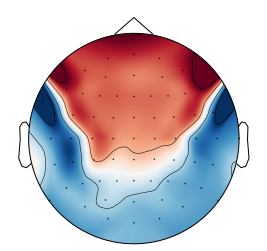

(<matplotlib.image.AxesImage at 0x7f52ea1119d0>,
 <matplotlib.contour.QuadContourSet at 0x7f52ea0b6090>)

In [5]:
phase_m2 = [circmean(phase_mat_LF[1,:,i],high=np.pi*2,low=0) for i in range(63)]
mne.viz.plot_topomap(phase_m2,pos2,cmap="RdBu_r")

[Text(1, 0, '$-\\pi/3$'),
 Text(1, 0, '$-\\pi/6$'),
 Text(1, 0, '0'),
 Text(1, 0, '$\\pi/6$'),
 Text(1, 0, '$\\pi/3$')]

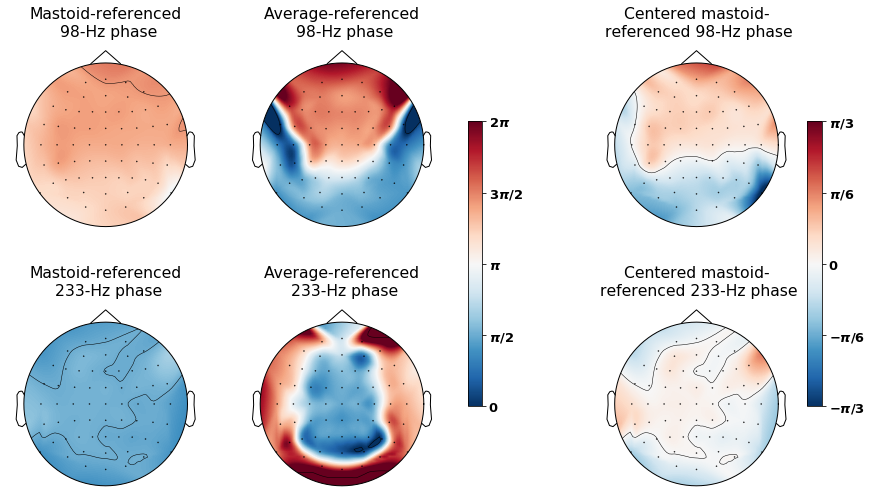

In [6]:
font = {'weight' : 'bold',
        'size'   : 13}

plt.rc('font', **font)

fig,ax = plt.subplots(2,3,figsize=(15,8))

phase_m1 = [circmean(phase_mat_LF[0,:,i],high=2*np.pi,low=0) for i in range(63)]
im,_ = mne.viz.plot_topomap(phase_m1,pos2,axes=ax[0,0],vmin=0,vmax=2*np.pi,show=False,contours=True,cmap="RdBu_r")
ax[0,0].set(title='Mastoid-referenced\n 98-Hz phase')

phase_m2 = [circmean(phase_mat_LF[1,:,i],high=2*np.pi,low=0) for i in range(63)]
im,_ = mne.viz.plot_topomap(phase_m2,pos2,axes=ax[0,1],vmin=0,vmax=2*np.pi,show=False,contours=True,cmap="RdBu_r")
ax[0,1].set(title='Average-referenced\n 98-Hz phase')

phase_m3 = [circmean(phase_mat_HF[0,:,i],high=2*np.pi,low=0) for i in range(63)]
im,_ = mne.viz.plot_topomap(phase_m3,pos2,axes=ax[1,0],vmin=0,vmax=2*np.pi,show=False,contours=True,cmap="RdBu_r")
ax[1,0].set(title='Mastoid-referenced\n 233-Hz phase')

phase_m4 = [circmean(phase_mat_HF[1,:,i],high=2*np.pi,low=0) for i in range(63)]
im,_ = mne.viz.plot_topomap(phase_m4,pos2,axes=ax[1,1],vmin=0,vmax=2*np.pi,show=False,contours=True,cmap="RdBu_r")
ax[1,1].set(title='Average-referenced\n 233-Hz phase')
    

phase_m1n = phase_m1-circmean(phase_m1)
im2,_ = mne.viz.plot_topomap(phase_m1n,pos2,axes=ax[0,2],vmin=-np.pi/3,vmax=np.pi/3,show=False,contours=True,cmap="RdBu_r")
ax[0,2].set(title='Centered mastoid-\n referenced 98-Hz phase')

phase_m3n = phase_m3-circmean(phase_m3)
im2,_ = mne.viz.plot_topomap(phase_m3n,pos2,axes=ax[1,2],vmin=-np.pi/3,vmax=np.pi/3,show=False,contours=True,cmap="RdBu_r")
ax[1,2].set(title='Centered mastoid-\n referenced 233-Hz phase')

bar1 = fig.colorbar(im,ax=ax[:,:2],ticks=[0, np.pi/2, np.pi, np.pi/2*3,np.pi*2],shrink=0.6)
bar1.ax.set_yticklabels(['0', r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])
bar1 = fig.colorbar(im2,ax=ax[:,2],ticks=[-np.pi/3, -np.pi/6,0, np.pi/6,np.pi/3],shrink=0.6)
bar1.ax.set_yticklabels([r'$-\pi/3$',r'$-\pi/6$','0',r'$\pi/6$',r'$\pi/3$'])



In [7]:
phase_mat_LF_c = np.empty(phase_mat_LF.shape)
for iSubject in range(phase_mat_LF.shape[1]):
    for iRef in range(2):
        phase_mat_LF_c[iRef,iSubject,:] = phase_mat_LF[iRef,iSubject,:] - circmean(phase_mat_LF[iRef,iSubject,:])
        
phase_mat_HF_c = np.empty(phase_mat_LF.shape)
for iSubject in range(phase_mat_HF.shape[1]):
    for iRef in range(2):
        phase_mat_HF_c[iRef,iSubject,:] = phase_mat_HF[iRef,iSubject,:] - circmean(phase_mat_HF[iRef,iSubject,:])

In [8]:
phase_mat_LF_std = np.empty(phase_mat_LF.shape[0:2])
for iSubject in range(phase_mat_LF.shape[1]):
    for iRef in range(2):
        phase_mat_LF_std[iRef,iSubject] = phase_mat_LF[iRef,iSubject,:].std()
        
phase_mat_HF_std = np.empty(phase_mat_LF.shape[0:2])
for iSubject in range(phase_mat_HF.shape[1]):
    for iRef in range(2):
        phase_mat_HF_std[iRef,iSubject] = phase_mat_HF[iRef,iSubject,:].std()

0.8309348964303189

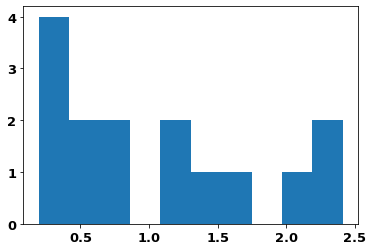

In [15]:
plt.hist(phase_mat_LF_std[0,:])
np.median(phase_mat_LF_std[0,:])

0.3448614696545039

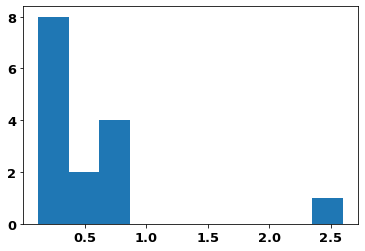

In [16]:
plt.hist(phase_mat_HF_std[0,:])
np.median(phase_mat_HF_std[0,:])

In [ ]:
phase_mat_LF_std.shape

In [ ]:
wilcoxon(phase_mat_LF_std[0,:],phase_mat_HF_std[0,:])

In [ ]:
wilcoxon(phase_mat_LF_std[1,:],phase_mat_HF_std[1,:])

In [ ]:
import pycircstat

In [ ]:
phase_mat = phase_mat_LF
pycircstat.watson_williams(phase_mat[0,:,0],
phase_mat[0,:,1],
phase_mat[0,:,2],
phase_mat[0,:,3],
phase_mat[0,:,4],
phase_mat[0,:,5],
phase_mat[0,:,6],
phase_mat[0,:,7],
phase_mat[0,:,8],
phase_mat[0,:,9],
phase_mat[0,:,10],
phase_mat[0,:,11],
phase_mat[0,:,12],
phase_mat[0,:,13],
phase_mat[0,:,14],
phase_mat[0,:,15],
phase_mat[0,:,16],
phase_mat[0,:,17],
phase_mat[0,:,18],
phase_mat[0,:,19],
phase_mat[0,:,20],
phase_mat[0,:,21],
phase_mat[0,:,22],
phase_mat[0,:,23],
phase_mat[0,:,24],
phase_mat[0,:,25],
phase_mat[0,:,26],
phase_mat[0,:,27],
phase_mat[0,:,28],
phase_mat[0,:,29],
phase_mat[0,:,30],
phase_mat[0,:,31],
phase_mat[0,:,32],
phase_mat[0,:,33],
phase_mat[0,:,34],
phase_mat[0,:,35],
phase_mat[0,:,36],
phase_mat[0,:,37],
phase_mat[0,:,38],
phase_mat[0,:,39],
phase_mat[0,:,40],
phase_mat[0,:,41],
phase_mat[0,:,42],
phase_mat[0,:,43],
phase_mat[0,:,44],
phase_mat[0,:,45],
phase_mat[0,:,46],
phase_mat[0,:,47],
phase_mat[0,:,48],
phase_mat[0,:,49],
phase_mat[0,:,50],
phase_mat[0,:,51],
phase_mat[0,:,52],
phase_mat[0,:,53],
phase_mat[0,:,54],
phase_mat[0,:,55],
phase_mat[0,:,56],
phase_mat[0,:,57],
phase_mat[0,:,58],
phase_mat[0,:,59],
phase_mat[0,:,60],
phase_mat[0,:,61],
phase_mat[0,:,62]
                          )

In [ ]:
phase_mat = phase_mat_HF
pycircstat.watson_williams(phase_mat[0,:,0],
phase_mat[0,:,1],
phase_mat[0,:,2],
phase_mat[0,:,3],
phase_mat[0,:,4],
phase_mat[0,:,5],
phase_mat[0,:,6],
phase_mat[0,:,7],
phase_mat[0,:,8],
phase_mat[0,:,9],
phase_mat[0,:,10],
phase_mat[0,:,11],
phase_mat[0,:,12],
phase_mat[0,:,13],
phase_mat[0,:,14],
phase_mat[0,:,15],
phase_mat[0,:,16],
phase_mat[0,:,17],
phase_mat[0,:,18],
phase_mat[0,:,19],
phase_mat[0,:,20],
phase_mat[0,:,21],
phase_mat[0,:,22],
phase_mat[0,:,23],
phase_mat[0,:,24],
phase_mat[0,:,25],
phase_mat[0,:,26],
phase_mat[0,:,27],
phase_mat[0,:,28],
phase_mat[0,:,29],
phase_mat[0,:,30],
phase_mat[0,:,31],
phase_mat[0,:,32],
phase_mat[0,:,33],
phase_mat[0,:,34],
phase_mat[0,:,35],
phase_mat[0,:,36],
phase_mat[0,:,37],
phase_mat[0,:,38],
phase_mat[0,:,39],
phase_mat[0,:,40],
phase_mat[0,:,41],
phase_mat[0,:,42],
phase_mat[0,:,43],
phase_mat[0,:,44],
phase_mat[0,:,45],
phase_mat[0,:,46],
phase_mat[0,:,47],
phase_mat[0,:,48],
phase_mat[0,:,49],
phase_mat[0,:,50],
phase_mat[0,:,51],
phase_mat[0,:,52],
phase_mat[0,:,53],
phase_mat[0,:,54],
phase_mat[0,:,55],
phase_mat[0,:,56],
phase_mat[0,:,57],
phase_mat[0,:,58],
phase_mat[0,:,59],
phase_mat[0,:,60],
phase_mat[0,:,61],
phase_mat[0,:,62]
                          )

In [ ]:
phase_mat = phase_mat_LF

pycircstat.watson_williams(phase_mat[1,:,0],
phase_mat[1,:,1],
phase_mat[1,:,2],
phase_mat[1,:,3],
phase_mat[1,:,4],
phase_mat[1,:,5],
phase_mat[1,:,6],
phase_mat[1,:,7],
phase_mat[1,:,8],
phase_mat[1,:,9],
phase_mat[1,:,10],
phase_mat[1,:,11],
phase_mat[1,:,12],
phase_mat[1,:,13],
phase_mat[1,:,14],
phase_mat[1,:,15],
phase_mat[1,:,16],
phase_mat[1,:,17],
phase_mat[1,:,18],
phase_mat[1,:,19],
phase_mat[1,:,20],
phase_mat[1,:,21],
phase_mat[1,:,22],
phase_mat[1,:,23],
phase_mat[1,:,24],
phase_mat[1,:,25],
phase_mat[1,:,26],
phase_mat[1,:,27],
phase_mat[1,:,28],
phase_mat[1,:,29],
phase_mat[1,:,30],
phase_mat[1,:,31],
phase_mat[1,:,32],
phase_mat[1,:,33],
phase_mat[1,:,34],
phase_mat[1,:,35],
phase_mat[1,:,36],
phase_mat[1,:,37],
phase_mat[1,:,38],
phase_mat[1,:,39],
phase_mat[1,:,40],
phase_mat[1,:,41],
phase_mat[1,:,42],
phase_mat[1,:,43],
phase_mat[1,:,44],
phase_mat[1,:,45],
phase_mat[1,:,46],
phase_mat[1,:,47],
phase_mat[1,:,48],
phase_mat[1,:,49],
phase_mat[1,:,50],
phase_mat[1,:,51],
phase_mat[1,:,52],
phase_mat[1,:,53],
phase_mat[1,:,54],
phase_mat[1,:,55],
phase_mat[1,:,56],
phase_mat[1,:,57],
phase_mat[1,:,58],
phase_mat[1,:,59],
phase_mat[1,:,60],
phase_mat[1,:,61],
phase_mat[1,:,62]
                          )

In [ ]:
phase_mat = phase_mat_HF

pycircstat.watson_williams(phase_mat[1,:,0],
phase_mat[1,:,1],
phase_mat[1,:,2],
phase_mat[1,:,3],
phase_mat[1,:,4],
phase_mat[1,:,5],
phase_mat[1,:,6],
phase_mat[1,:,7],
phase_mat[1,:,8],
phase_mat[1,:,9],
phase_mat[1,:,10],
phase_mat[1,:,11],
phase_mat[1,:,12],
phase_mat[1,:,13],
phase_mat[1,:,14],
phase_mat[1,:,15],
phase_mat[1,:,16],
phase_mat[1,:,17],
phase_mat[1,:,18],
phase_mat[1,:,19],
phase_mat[1,:,20],
phase_mat[1,:,21],
phase_mat[1,:,22],
phase_mat[1,:,23],
phase_mat[1,:,24],
phase_mat[1,:,25],
phase_mat[1,:,26],
phase_mat[1,:,27],
phase_mat[1,:,28],
phase_mat[1,:,29],
phase_mat[1,:,30],
phase_mat[1,:,31],
phase_mat[1,:,32],
phase_mat[1,:,33],
phase_mat[1,:,34],
phase_mat[1,:,35],
phase_mat[1,:,36],
phase_mat[1,:,37],
phase_mat[1,:,38],
phase_mat[1,:,39],
phase_mat[1,:,40],
phase_mat[1,:,41],
phase_mat[1,:,42],
phase_mat[1,:,43],
phase_mat[1,:,44],
phase_mat[1,:,45],
phase_mat[1,:,46],
phase_mat[1,:,47],
phase_mat[1,:,48],
phase_mat[1,:,49],
phase_mat[1,:,50],
phase_mat[1,:,51],
phase_mat[1,:,52],
phase_mat[1,:,53],
phase_mat[1,:,54],
phase_mat[1,:,55],
phase_mat[1,:,56],
phase_mat[1,:,57],
phase_mat[1,:,58],
phase_mat[1,:,59],
phase_mat[1,:,60],
phase_mat[1,:,61],
phase_mat[1,:,62]
                          )